<a href="https://colab.research.google.com/github/lazysjb/camelyon16/blob/master/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling 

## Get Moduels and Data

In [0]:
# install tensorflow 
#!pip install tensorflow
#!pip install Keras --upgrade


#! pip install Image


In [0]:
# import libraries
from google.colab import drive
import os
import keras
import zipfile
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL


Using TensorFlow backend.


In [0]:
# mount drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# working directory
path = 'gdrive/My Drive/STUDY/Columbia/Term 2/Applied Deep Learning/Project/Final Training Data/shared_files'
os.listdir(path)


['train_val_test_split.json',
 'tumor_img_meta_info.json',
 'zoom_5_60_60_partition.zip',
 'zoom_5_60_60_partition',
 'zoom_2_200_200_partition.zip',
 'bounding_boxes',
 'all_info_0.4_grayscale_tol_with_roi.json',
 'zoom_1_256_256_partition_truncated.zip',
 'zoom_2_256_256_zoom_1_pair_truncated.zip']

In [0]:
# unzip data folders to root dir
zf = zipfile.ZipFile(os.path.join(path, 'zoom_1_256_256_partition_truncated.zip'))
zf.extractall()


In [0]:



# unzip data folders to root dir
zf = zipfile.ZipFile(os.path.join(path, 'zoom_2_256_256_zoom_1_pair_truncated.zip'))
zf.extractall()

In [0]:
os.listdir('zoom_2_256_256_zoom_1_pair_truncated/train')

['slide']

## Preprocess Data

In [0]:
# get metadata
df_meta_greyscale = pd.read_json('zoom_2_256_256_zoom_1_pair_truncated/meta/all_info_0.4_grayscale_tol_with_roi_zoom_1_zoom_2_pair_truncated.json')
df_meta_greyscale = df_meta_greyscale.sample(frac=1).reset_index(drop=True)
df_meta_greyscale.head()

,zoom_1_file_name,img_id,zoom_1_include,zoom_1_label,zoom_1_non_gray_ratio,type,zoom_1_is_roi,zoom_2_file_name
0,tumor_slide_031_split_291_94.png,31,1,0,0.651016,val,1,tumor_slide_031_split_291_94_overlap_128_offse...
1,tumor_slide_078_split_21_70.png,78,1,0,0.973053,test,1,tumor_slide_078_split_21_70_overlap_128_offset...
2,tumor_slide_110_split_26_96.png,110,1,1,0.974548,train,1,tumor_slide_110_split_26_96_overlap_128_offset...
3,tumor_slide_094_split_47_154.png,94,0,0,0.263504,train,1,tumor_slide_094_split_47_154_overlap_128_offse...
4,tumor_slide_101_split_56_32.png,101,1,0,0.971832,train,1,tumor_slide_101_split_56_32_overlap_128_offset...


In [0]:
# cast target as string (keras needs strings)
%%capture
df_meta_greyscale.loc[:, 'zoom_1_label'] = df_meta_greyscale.zoom_1_label.astype('str')

In [0]:
# get patches with sufficient tissue
df_train = df_meta_greyscale.loc[(df_meta_greyscale.zoom_1_include == 1) & (df_meta_greyscale['type'] == 'train'),:]

df_train.head()

,zoom_1_file_name,img_id,zoom_1_include,zoom_1_label,zoom_1_non_gray_ratio,type,zoom_1_is_roi,zoom_2_file_name
2,tumor_slide_110_split_26_96.png,110,1,1,0.974548,train,1,tumor_slide_110_split_26_96_overlap_128_offset...
4,tumor_slide_101_split_56_32.png,101,1,0,0.971832,train,1,tumor_slide_101_split_56_32_overlap_128_offset...
7,tumor_slide_110_split_71_66.png,110,1,0,0.893982,train,1,tumor_slide_110_split_71_66_overlap_128_offset...
11,tumor_slide_023_split_243_92.png,23,1,0,0.864059,train,1,tumor_slide_023_split_243_92_overlap_128_offse...
12,tumor_slide_035_split_135_64.png,35,1,0,0.904495,train,1,tumor_slide_035_split_135_64_overlap_128_offse...


In [0]:
# get patches with sufficient tissue
df_val = df_meta_greyscale.loc[(df_meta_greyscale.zoom_1_include == 1) & (df_meta_greyscale['type'] == 'val'),:]

df_val.head()

,zoom_1_file_name,img_id,zoom_1_include,zoom_1_label,zoom_1_non_gray_ratio,type,zoom_1_is_roi,zoom_2_file_name
0,tumor_slide_031_split_291_94.png,31,1,0,0.651016,val,1,tumor_slide_031_split_291_94_overlap_128_offse...
6,tumor_slide_031_split_289_104.png,31,1,0,0.961411,val,1,tumor_slide_031_split_289_104_overlap_128_offs...
9,tumor_slide_012_split_247_109.png,12,1,0,0.908035,val,1,tumor_slide_012_split_247_109_overlap_128_offs...
18,tumor_slide_064_split_277_143.png,64,1,0,0.931961,val,1,tumor_slide_064_split_277_143_overlap_128_offs...
27,tumor_slide_012_split_141_93.png,12,1,0,0.930939,val,1,tumor_slide_012_split_141_93_overlap_128_offse...


In [0]:
# get patches with sufficient tissue
df_test = df_meta_greyscale.loc[(df_meta_greyscale.zoom_1_include == 1) & (df_meta_greyscale['type'] == 'test'),:]

df_test.head()

,zoom_1_file_name,img_id,zoom_1_include,zoom_1_label,zoom_1_non_gray_ratio,type,zoom_1_is_roi,zoom_2_file_name
1,tumor_slide_078_split_21_70.png,78,1,0,0.973053,test,1,tumor_slide_078_split_21_70_overlap_128_offset...
10,tumor_slide_002_split_178_75.png,2,1,0,0.735046,test,1,tumor_slide_002_split_178_75_overlap_128_offse...
14,tumor_slide_078_split_186_75.png,78,1,1,0.997467,test,1,tumor_slide_078_split_186_75_overlap_128_offse...
16,tumor_slide_057_split_247_60.png,57,1,0,0.473938,test,1,tumor_slide_057_split_247_60_overlap_128_offse...
22,tumor_slide_078_split_156_82.png,78,1,1,0.997238,test,1,tumor_slide_078_split_156_82_overlap_128_offse...


In [0]:
# downsample df 
df_train['zoom_1_label'].value_counts()


0    51283
1     7344
Name: zoom_1_label, dtype: int64

In [0]:
df_down = pd.concat([df_train[df_train['zoom_1_label'] == '0'].sample(7344), df_train[df_train['zoom_1_label'] == '1']], axis = 0)
df_down = df_down.sample(frac=1).reset_index(drop=True)

In [0]:
df_down.head()

,zoom_1_file_name,img_id,zoom_1_include,zoom_1_label,zoom_1_non_gray_ratio,type,zoom_1_is_roi,zoom_2_file_name
0,tumor_slide_101_split_39_27.png,101,1,0,0.990387,train,1,tumor_slide_101_split_39_27_overlap_128_offset...
1,tumor_slide_084_split_123_42.png,84,1,0,0.945267,train,1,tumor_slide_084_split_123_42_overlap_128_offse...
2,tumor_slide_101_split_33_54.png,101,1,1,0.970200,train,1,tumor_slide_101_split_33_54_overlap_128_offset...
3,tumor_slide_101_split_43_39.png,101,1,0,0.988785,train,1,tumor_slide_101_split_43_39_overlap_128_offset...
4,tumor_slide_094_split_54_156.png,94,1,1,0.954819,train,1,tumor_slide_094_split_54_156_overlap_128_offse...


In [0]:
df_down.zoom_1_label.value_counts()

1    7344
0    7344
Name: zoom_1_label, dtype: int64

In [0]:
df_up = pd.concat([df_train, df_train[df_train['zoom_1_label'] == '1'].sample(48000, replace=True)], axis = 0)

In [0]:
df_up.zoom_1_label.value_counts()

1    55344
0    51283
Name: zoom_1_label, dtype: int64

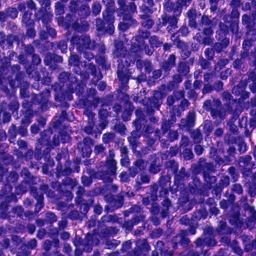

In [0]:


image = PIL.Image.open('zoom_1_256_256_partition_truncated/train/slide/' + df_down.zoom_1_file_name.iloc[0]
)
image

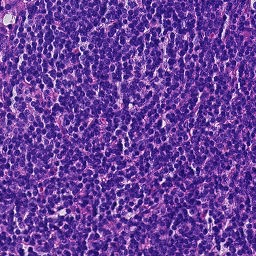

In [0]:

image = PIL.Image.open('zoom_2_256_256_zoom_1_pair_truncated/train/slide/' + df_down.zoom_2_file_name.iloc[0])
image

In [0]:
# specify image data generator with augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# read data from the train directory
train_generator_1 = datagen.flow_from_dataframe(dataframe = df_down, 
                                              directory = 'zoom_1_256_256_partition_truncated/train/slide',
                                              x_col = 'zoom_1_file_name', 
                                              y_col='zoom_1_label',
                                              class_mode='binary', 
                                              target_size=(256,256), 
                                              batch_size=32,
                                              drop_duplicates=False,
                                              shuffle = False)

# read data from the train directory
train_generator_2 = datagen.flow_from_dataframe(dataframe = df_down, 
                                              directory = 'zoom_2_256_256_zoom_1_pair_truncated/train/slide',
                                              x_col = 'zoom_2_file_name', 
                                              y_col='zoom_1_label',
                                              class_mode='binary', 
                                              target_size=(256,256), 
                                              batch_size=32,
                                              drop_duplicates=False,
                                              shuffle = False)



Found 14688 images belonging to 2 classes.
Found 14688 images belonging to 2 classes.


In [0]:
len(train_generator_1)

459

In [0]:
# specify image data generator with augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# read data from the train directory
val_generator_1 = datagen.flow_from_dataframe(dataframe = df_val, 
                                              directory = 'zoom_1_256_256_partition_truncated/val/slide',
                                              x_col = 'zoom_1_file_name', 
                                              y_col='zoom_1_label',
                                              class_mode='binary', 
                                              target_size=(256,256), 
                                              batch_size=32,
                                              drop_duplicates=False,
                                              shuffle = False)

# read data from the train directory
val_generator_2 = datagen.flow_from_dataframe(dataframe = df_val, 
                                              directory = 'zoom_2_256_256_zoom_1_pair_truncated/val/slide',
                                              x_col = 'zoom_2_file_name', 
                                              y_col='zoom_1_label',
                                              class_mode='binary', 
                                              target_size=(256,256), 
                                              batch_size=32,
                                              drop_duplicates=False,
                                              shuffle = False)



Found 16239 images belonging to 2 classes.
Found 16239 images belonging to 2 classes.


In [0]:
len(val_generator_1)

508

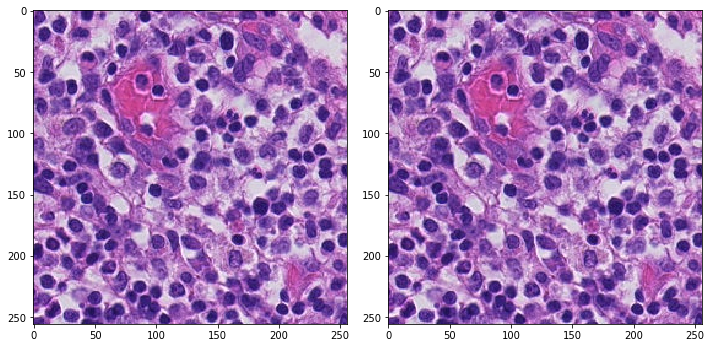

In [0]:
# plot augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 2, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_generator_1[0][0][0] for i in range(5)]

plotImages(augmented_images)

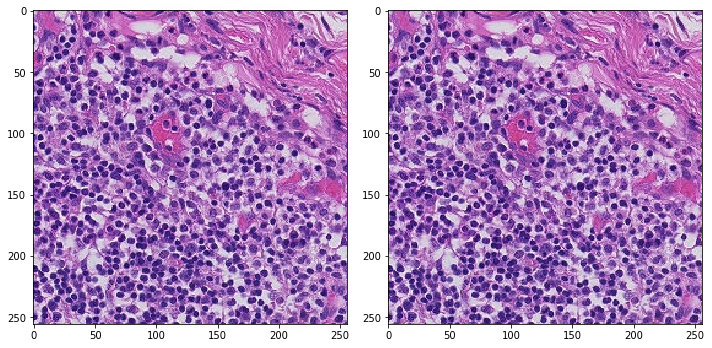

In [0]:
augmented_images = [train_generator_2[0][0][0] for i in range(5)]

plotImages(augmented_images)

## Naive baseline

In [0]:
df_val['zoom_1_label'].value_counts(normalize = True)

0    0.912495
1    0.087505
Name: zoom_1_label, dtype: float64

##  Baseline model

In [0]:
# specify model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# compile model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# print model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 32)      18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 500000)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                32000064  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total para

In [0]:
EPOCHS = 20

history_1 = model.fit_generator(train_generator_1,
                   epochs = EPOCHS,
                   validation_data = val_generator_1,
                   verbose=1)

## Adjusted class weights model

In [0]:
# try again with balanced class weights
import sklearn
import numpy as np

y_train = df_train['label']

class_weights = sklearn.utils.class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights

array([0.58759768, 3.35395683])

In [0]:
# create class weights dictionary
cw = dict(zip([0,1], class_weights))
# doesnt work for some reason 
cw

{0: 0.587597680867154, 1: 3.353956834532374}

In [0]:
# specify model architecture
model_2 = tf.keras.Sequential()

model_2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(60, 60, 3)))
model_2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(tf.keras.layers.MaxPooling2D((2, 2)))

model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Flatten(input_shape = (60, 60, 3)))
model_2.add(tf.keras.layers.Dense(256, activation='relu'))
model_2.add(tf.keras.layers.Dense(128, activation='tanh'))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [0]:
# recompile model
model_2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
__________

In [0]:
EPOCHS = 40

history_2 = model_2.fit_generator(train_generator,
                   epochs = EPOCHS,
                   validation_data = val_generator,
                   class_weight = class_weights,
                   shuffle=True)

Epoch 1/40
256/256 [==============================] - 16s 61ms/step - loss: 0.6417 - acc: 0.6007 - val_loss: 0.4047 - val_acc: 0.8807
Epoch 2/40
256/256 [==============================] - 16s 62ms/step - loss: 0.4836 - acc: 0.7635 - val_loss: 0.3819 - val_acc: 0.8807
Epoch 3/40
256/256 [==============================] - 15s 59ms/step - loss: 0.4575 - acc: 0.7765 - val_loss: 0.4504 - val_acc: 0.8691
Epoch 4/40
256/256 [==============================] - 16s 63ms/step - loss: 0.4310 - acc: 0.7904 - val_loss: 0.3667 - val_acc: 0.8807
Epoch 5/40
256/256 [==============================] - 15s 60ms/step - loss: 0.4260 - acc: 0.7937 - val_loss: 0.3291 - val_acc: 0.8807
Epoch 6/40
256/256 [==============================] - 15s 59ms/step - loss: 0.4070 - acc: 0.8051 - val_loss: 0.3884 - val_acc: 0.8714
Epoch 7/40
256/256 [==============================] - 15s 59ms/step - loss: 0.4011 - acc: 0.8127 - val_loss: 0.3195 - val_acc: 0.8807
Epoch 8/40
256/256 [==============================] - 15s 59ms

In [0]:
model.predict(val_generator)

array([[0.2554441 ],
       [0.90633047],
       [0.2586465 ],
       ...,
       [0.09441949],
       [0.0263592 ],
       [0.3309168 ]], dtype=float32)

In [0]:
y_val = df_val['label']
y_val.value_counts(normalize=True)

0    0.880748
1    0.119252
Name: label, dtype: float64

## Use Transfer Learning

In [0]:
from tensorflow.keras.applications import VGG16, VGG19

In [0]:
conv_base_1 = VGG16(weights='imagenet',
                    include_top=False, 
                    input_shape=(256, 256, 3))


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [0]:
conv_base_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
# instantiate model
model_1 = tf.keras.models.Sequential()

model_1.add(conv_base_1)
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(256, activation='relu'))
model_1.add(tf.keras.layers.Dropout(rate = 0.4))
model_1.add(tf.keras.layers.Dense(256, activation='relu'))
model_1.add(tf.keras.layers.Dropout(rate = 0.4))
model_1.add(tf.keras.layers.Dense(128, activation='relu'))
model_1.add(tf.keras.layers.Dropout(rate = 0.4))
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

conv_base_1.trainable = False

model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               8388864   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
__________

In [0]:
history_transfer = model_1.fit_generator(train_generator,
                   epochs = 20,
                   validation_data = val_generator,
                   verbose=1)

Epoch 1/20
221/221 [==============================] - 241s 1s/step - loss: 0.3913 - acc: 0.8503 - val_loss: 0.2292 - val_acc: 0.9336
Epoch 2/20
221/221 [==============================] - 225s 1s/step - loss: 0.2880 - acc: 0.8847 - val_loss: 0.1976 - val_acc: 0.9514
Epoch 3/20
221/221 [==============================] - 227s 1s/step - loss: 0.2716 - acc: 0.8853 - val_loss: 0.1494 - val_acc: 0.9594
Epoch 4/20
221/221 [==============================] - 227s 1s/step - loss: 0.2473 - acc: 0.8963 - val_loss: 0.2165 - val_acc: 0.9485
Epoch 5/20
221/221 [==============================] - 232s 1s/step - loss: 0.2436 - acc: 0.9024 - val_loss: 0.1804 - val_acc: 0.9545
Epoch 6/20
221/221 [==============================] - 244s 1s/step - loss: 0.2396 - acc: 0.8989 - val_loss: 0.1846 - val_acc: 0.9503
Epoch 7/20
221/221 [==============================] - 342s 2s/step - loss: 0.2180 - acc: 0.9114 - val_loss: 0.2209 - val_acc: 0.9529
Epoch 8/20
221/221 [==============================] - 321s 1s/step - 

## Grid search model

In [0]:
def make_model(units_1, units_2, reg_str_1, reg_str_2):
  
  conv_base_1 = VGG16(weights='imagenet',
                    include_top=False, 
                    input_shape=(60, 60, 3))
  
  model = tf.keras.models.Sequential()
  
  model_1.add(conv_base_1)
  
  model_1.add(tf.keras.layers.Flatten())
  
  model_1.add(tf.keras.layers.Dense(units_1, activation='relu',
                                   kernel_regularizer=keras.regularizers.l2(l= reg_str_1)))
  
  model_1.add(tf.keras.layers.Dense(units_2, activation='relu',
                                   kernel_regularizer=keras.regularizers.l2(l= reg_str_2)))
  
  model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  
  conv_base_1.trainable = False

  model.compile(optimizer = 'adam', 
                  loss='binary_crossentropy',
                 metrics=['acc'])
  
  return model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit 

In [0]:
clf = KerasClassifier(make_model)

param_grid = {'epochs': [30],
              'units_1': [128,256], 
              'units_2': [64,128],
              'reg_str_1': np.logspace(-3,3,3),
              'reg_str_2': np.logspace(-3,3,3)
             }

grid = GridSearchCV(clf, param_grid=param_grid, cv= StratifiedShuffleSplit(1))
grid.fit(train_generator)

##More complex convolutional model

In [0]:
model_conv_1 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape = (256,256,3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),   
    
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate = 0.15),

    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model_conv_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [0]:
model_conv_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 252, 252, 32)      0         
_________________________________________________________________
batch_normalization_v1_7 (Ba (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 32)      0         
__________

In [0]:
history_conv_1 = model_conv_1.fit_generator(train_generator, validation_data= val_generator, epochs = 100)

## Even bigger

In [0]:
model_conv_2 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape = (60,60,3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),   
    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    
    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    
    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  
    
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate = 0.25),

    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model_conv_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [0]:
history_conv_2 = model_conv_1.fit_generator(train_generator, validation_data= val_generator, epochs = 100)

Epoch 1/100
256/256 [==============================] - 8s 33ms/step - loss: 0.0269 - acc: 0.9938 - val_loss: 1.3814 - val_acc: 0.8737
Epoch 2/100
256/256 [==============================] - 8s 33ms/step - loss: 0.0123 - acc: 0.9969 - val_loss: 1.8202 - val_acc: 0.8784
Epoch 3/100
256/256 [==============================] - 9s 36ms/step - loss: 0.0174 - acc: 0.9963 - val_loss: 1.8930 - val_acc: 0.8589
Epoch 4/100
256/256 [==============================] - 9s 36ms/step - loss: 0.0467 - acc: 0.9941 - val_loss: 1.1924 - val_acc: 0.8457
Epoch 5/100
256/256 [==============================] - 9s 33ms/step - loss: 0.0162 - acc: 0.9958 - val_loss: 1.9406 - val_acc: 0.8659
Epoch 6/100
256/256 [==============================] - 8s 33ms/step - loss: 0.0057 - acc: 0.9977 - val_loss: 2.0328 - val_acc: 0.8683
Epoch 7/100
256/256 [==============================] - 8s 33ms/step - loss: 0.0245 - acc: 0.9952 - val_loss: 1.9774 - val_acc: 0.8644
Epoch 8/100
256/256 [==============================] - 9s 33ms

## Model with residual connections

In [0]:
inputs = tf.keras.layers.Input(shape=(28,28,1))

conv1_1 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding = 'same')(inputs)
conv1_2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv1_1)
maxpool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1_2)


conv2_1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_1)
skip2 = tf.keras.layers.add([maxpool1, conv2_2])
maxpool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(skip2)

conv3_1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool2)
conv3_2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv3_1)
skip3 = tf.keras.layers.add([maxpool2, conv3_2])
maxpool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(skip3)


flat = tf.keras.layers.Flatten()(maxpool3)
dense = tf.keras.layers.Dense(64, activation='relu')(flat)
predictions = tf.keras.layers.Dense(10, activation='softmax')(dense)

model_skip = tf.keras.models.Model(inputs=inputs, outputs=predictions)

model_skip.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])



## Much bigger with residual connections

In [0]:
inputs = Input(shape=(256, 256, 1))

x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(x1)

x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)


x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)


x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x2)
skip2 = add([maxpool1, x2])
maxpool2 = MaxPooling2D(pool_size=(2, 2))(skip2)

x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool2)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)

x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)

x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
skip3 = add([maxpool2, x3])
maxpool3 = MaxPooling2D(pool_size=(2, 2))(skip3)

x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool3)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)

x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)

x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
x4 = Conv2D(32, (3, 3), activation='relu', padding='same')(x4)
skip4 = add([maxpool3, x4])
maxpool4 = MaxPooling2D(pool_size=(2, 2))(skip4)

flat = Flatten()(maxpool4)
dense = Dense(128, activation='relu')(flat)
dense = Dense(64, activation='relu')(dense)
predictions = Dense(1, activation='sigmoid')(dense)

model_skip = Model(inputs=inputs, outputs=predictions)

model_skip.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])


## Model with multiple inputs

In [0]:
from tensorflow.keras.layers import Input, Dense, concatenate, Conv2D, Flatten
from tensorflow.keras.models import Model

In [0]:
# specify image data generator with augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

def generate_generator_multiple(generator, df1, dir1, df2, dir2, batch_size, img_height, img_width):
  
    genX1 = generator.flow_from_dataframe(dataframe = df1, 
                                              directory = dir1,
                                              x_col = 'zoom_1_file_name', 
                                              y_col='zoom_1_label',
                                              class_mode='binary', 
                                              target_size=(img_height, img_width), 
                                              batch_size = batch_size,
                                              drop_duplicates=False,
                                              shuffle = False)
    
    genX2 = generator.flow_from_dataframe(dataframe = df2, 
                                              directory = dir2,
                                              x_col = 'zoom_2_file_name', 
                                              y_col='zoom_1_label',
                                              class_mode='binary', 
                                              target_size=(img_height, img_width), 
                                              batch_size=batch_size,
                                              drop_duplicates=False,
                                              shuffle = False)

    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            yield [X1i[0], X2i[0]], X2i[1]  #Yield both images and their mutual label
            
            
train_generator = generate_generator_multiple(generator = datagen,
                                              df1 = df_down,
                                              dir1 = 'zoom_1_256_256_partition_truncated/train/slide',
                                              df2 = df_down,
                                              dir2= 'zoom_2_256_256_zoom_1_pair_truncated/train/slide',
                                              batch_size=32,
                                              img_height=256,
                                              img_width=256)       
     
val_generator = generate_generator_multiple(generator = datagen,
                                              df1 = df_val,
                                              dir1 = 'zoom_1_256_256_partition_truncated/val/slide',
                                              df2 = df_val,
                                              dir2= 'zoom_2_256_256_zoom_1_pair_truncated/val/slide',
                                              batch_size=32,
                                              img_height=256,
                                              img_width=256)                   


In [0]:
# define two sets of inputs
zoom_1 = Input(shape=(256,256,3))
zoom_2 = Input(shape=(256,256,3))
 
# process zoom level 1 patch
conv_1 = Conv2D(32, (3,3), padding = 'same', activation="relu")(zoom_1)
conv_1 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_1)
conv_1 = Model(inputs=zoom_1, outputs=conv_1)
 
# process zoom level 2 patch
conv_2 = Conv2D(32, (3,3), padding = 'same', activation="relu")(zoom_2)
conv_2 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_2)
conv_2 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_2)
conv_2 = Model(inputs=zoom_2, outputs=conv_2)
 
# combine output of convolutional layers
combined = concatenate([conv_1.output, conv_2.output])
flattened = Flatten()(combined)
 
# fully connected layer after combined outputs
z = Dense(2, activation="relu")(flattened)
z = Dense(2, activation="softmax")(z)
 
# instantiate model
model_mult = Model(inputs=[conv_1.input, conv_2.input], outputs=z)

model_mult.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
model_mult.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_25 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 256, 256, 32) 896         input_26[0][0]                   
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 256, 256, 32) 896         input_25[0][0]                   
__________________________________________________________________________________________________
conv2d_66 

In [0]:
import pydot
import graphviz
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

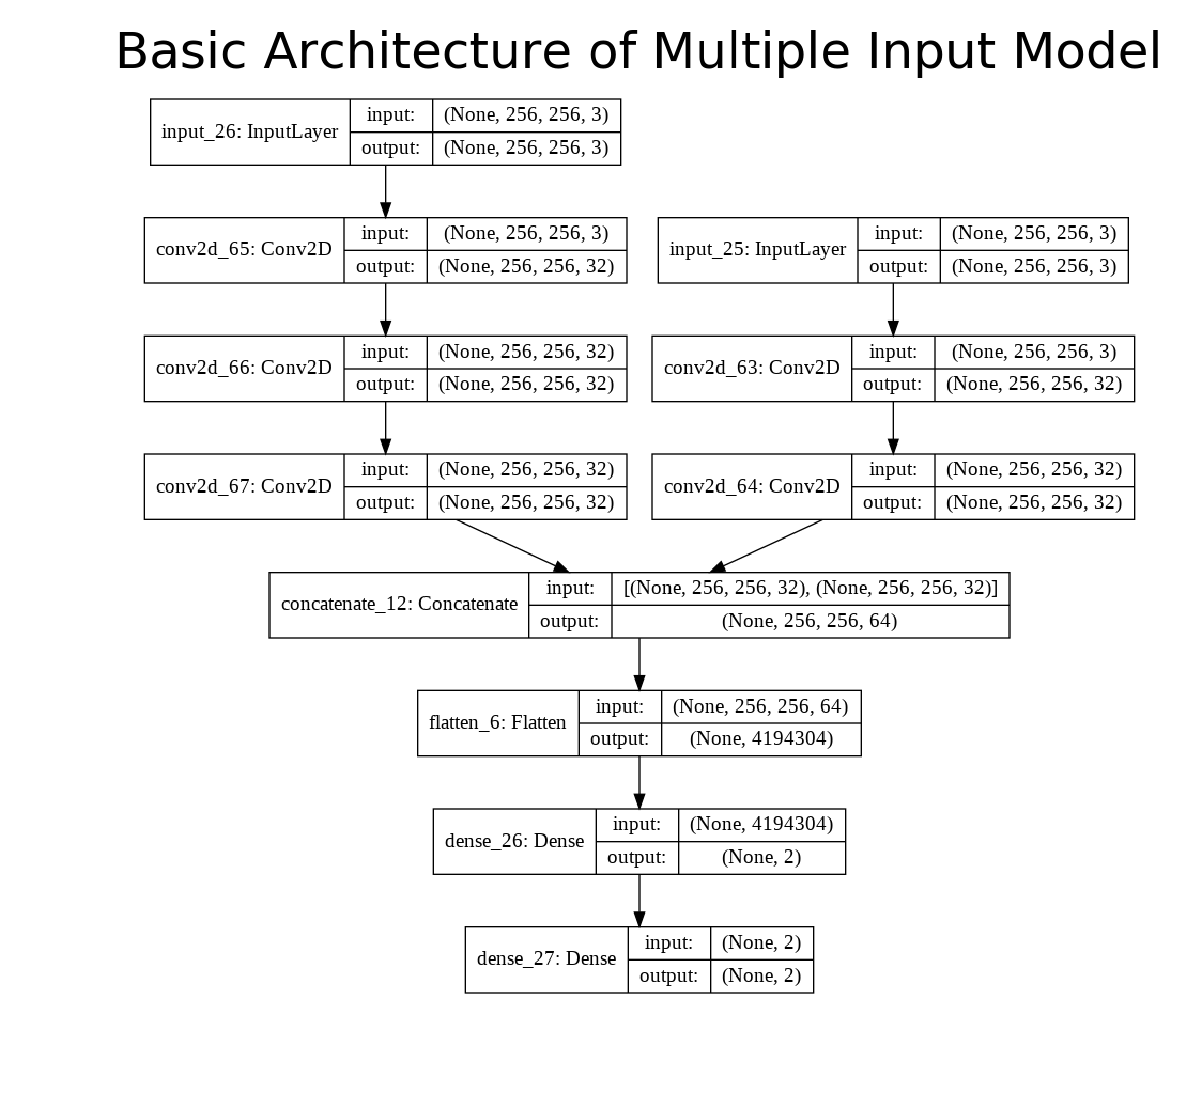

In [0]:


image_path = 'model.png'
keras.utils.plot_model(model_mult, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=300)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.title('Basic Architecture of Multiple Input Model')
plt.show()

In [0]:
history_mult = model_mult.fit_generator(train_generator, validation_data=val_generator, epochs = 100, steps_per_epoch = int(df_down.shape[0]/32), validation_steps= int(df_val.shape[0]/32), shuffle = False)

Found 14688 images belonging to 2 classes.
Found 14688 images belonging to 2 classes.
Epoch 1/100
458/459 [============================>.] - ETA: 0s - loss: 8.0430 - acc: 0.5002Found 16239 images belonging to 2 classes.
Found 16239 images belonging to 2 classes.
459/459 [==============================] - 440s 959ms/step - loss: 8.0606 - acc: 0.4991 - val_loss: 1.4117 - val_acc: 0.9124
Epoch 2/100
459/459 [==============================] - 442s 964ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4117 - val_acc: 0.9124
Epoch 3/100
459/459 [==============================] - 434s 946ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4117 - val_acc: 0.9124
Epoch 4/100
459/459 [==============================] - 439s 957ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4117 - val_acc: 0.9124
Epoch 5/100
459/459 [==============================] - 433s 942ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4117 - val_acc: 0.9124
Epoch 6/100
459/459 [==============================] - 434s 945m

## Double input transfer learning

In [0]:
from tensorflow.keras.layers import Input, concatenate, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model

In [0]:
conv_base_zoom_1 = VGG19(weights='imagenet',
                    include_top=False, 
                    input_shape=(256, 256, 3))

conv_base_zoom_2 = VGG16(weights='imagenet',
                    include_top=False, 
                    input_shape=(256, 256, 3))


In [0]:
# define two sets of inputs
zoom_1 = Input(shape=(256,256,3))
zoom_2 = Input(shape=(256,256,3))
 
# process zoom level 1 patch
conv_1 = conv_base_zoom_1(zoom_1)
conv_1 = Model(inputs=zoom_1, outputs=conv_1)
 
# process zoom level 2 patch
conv_2 = conv_base_zoom_2(zoom_2)
conv_2 = Model(inputs=zoom_2, outputs=conv_2)
 
# combine output of convolutional layers
combined = concatenate([conv_1.output, conv_2.output])
flattened = Flatten()(combined)
 
# fully connected layer after combined outputs
z = Dense(512, activation="relu")(flattened)
z = Dense(256, activation="relu")(z)
z = Dense(2, activation="softmax")(z)
 
# instantiate model
model_mult_2 = Model(inputs=[conv_1.input, conv_2.input], outputs=z)

model_mult_2.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
model_mult_2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_29 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
vgg19 (Model)                   (None, 8, 8, 512)    20024384    input_28[0][0]                   
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 8, 8, 512)    14714688    input_29[0][0]                   
__________________________________________________________________________________________________
concatenat

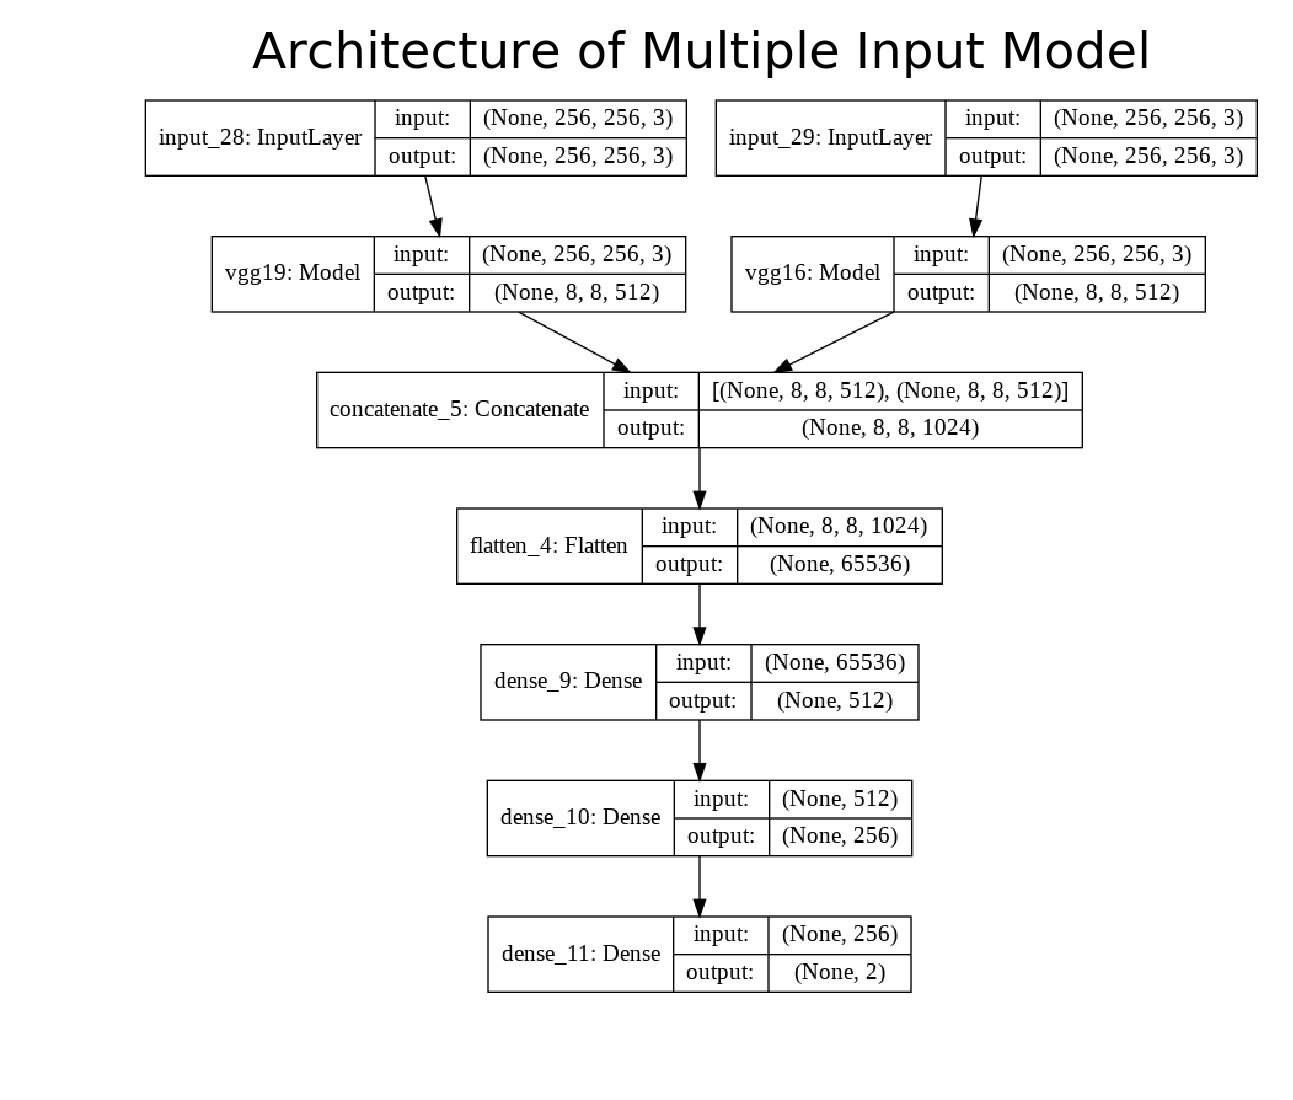

In [0]:
image_path = 'model.png'
keras.utils.plot_model(model_mult_2, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=300)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.title('Architecture of Multiple Input Model')
plt.show()

In [0]:
history_mult = model_mult_2.fit_generator(train_generator, validation_data=val_generator, epochs = 100, steps_per_epoch = int(df_down.shape[0]/32), validation_steps= int(df_val.shape[0]/32), shuffle = False)

Found 14688 images belonging to 2 classes.
Found 14688 images belonging to 2 classes.
Epoch 1/100
458/459 [============================>.] - ETA: 1s - loss: 8.0437 - acc: 0.4990Found 16239 images belonging to 2 classes.
Found 16239 images belonging to 2 classes.
459/459 [==============================] - 814s 2s/step - loss: 8.0613 - acc: 0.4980 - val_loss: 1.4117 - val_acc: 0.9124
Epoch 2/100
459/459 [==============================] - 807s 2s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4097 - val_acc: 0.9124
Epoch 3/100
459/459 [==============================] - 804s 2s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4117 - val_acc: 0.9123
Epoch 4/100
459/459 [==============================] - 803s 2s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4107 - val_acc: 0.9124
Epoch 5/100
459/459 [==============================] - 801s 2s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4117 - val_acc: 0.9123
Epoch 6/100
459/459 [==============================] - 800s 2s/step - loss: 8.0

KeyboardInterrupt: ignored

In [0]:
history_mult_2 = model_mult_2.fit_generator(train_generator, validation_data=val_generator, epochs = 100, steps_per_epoch = int(df_down.shape[0]/32), validation_steps= int(df_val.shape[0]/32), shuffle = True)

Epoch 1/100
459/459 [==============================] - 809s 2s/step - loss: 8.0608 - acc: 0.4983 - val_loss: 1.4107 - val_acc: 0.9124
Epoch 2/100
459/459 [==============================] - 807s 2s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4117 - val_acc: 0.9123
Epoch 3/100
459/459 [==============================] - 808s 2s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4097 - val_acc: 0.9124
Epoch 4/100
459/459 [==============================] - 807s 2s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4107 - val_acc: 0.9124
Epoch 5/100
459/459 [==============================] - 808s 2s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4048 - val_acc: 0.9128
Epoch 6/100
424/459 [==========================>...] - ETA: 43s - loss: 8.7243 - acc: 0.4587

## Larger Custom Dual Input CNN

In [0]:
# define two sets of inputs
zoom_1 = Input(shape=(256,256,3))
zoom_2 = Input(shape=(256,256,3))
 
# process zoom level 1 patch
conv_1 = Conv2D(32, (3,3), padding = 'same', activation="relu")(zoom_1)
conv_1 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_1)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)

conv_1 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_1)
conv_1 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_1)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)

conv_1 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_1)
conv_1 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_1)
conv_1 = MaxPool2D(pool_size=(2, 2))(conv_1)

conv_1 = Model(inputs=zoom_1, outputs=conv_1)
 
# process zoom level 2 patch
conv_2 = Conv2D(32, (3,3), padding = 'same', activation="relu")(zoom_2)
conv_2 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_2)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)

conv_2 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_2)
conv_2 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_2)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)

conv_2 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_2)
conv_2 = Conv2D(32, (3,3), padding = 'same', activation="relu")(conv_2)
conv_2 = MaxPool2D(pool_size=(2, 2))(conv_2)


conv_2 = Model(inputs=zoom_2, outputs=conv_2)
 
# combine output of convolutional layers
combined = concatenate([conv_1.output, conv_2.output])
flattened = Flatten()(combined)
 
# fully connected layer after combined outputs
z = Dense(128, activation="relu")(flattened)
z = Dense(64, activation="relu")(z)
z = Dense(2, activation="softmax")(z)
 
# instantiate model
model_mult_3 = Model(inputs=[conv_1.input, conv_2.input], outputs=z)

model_mult_3.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

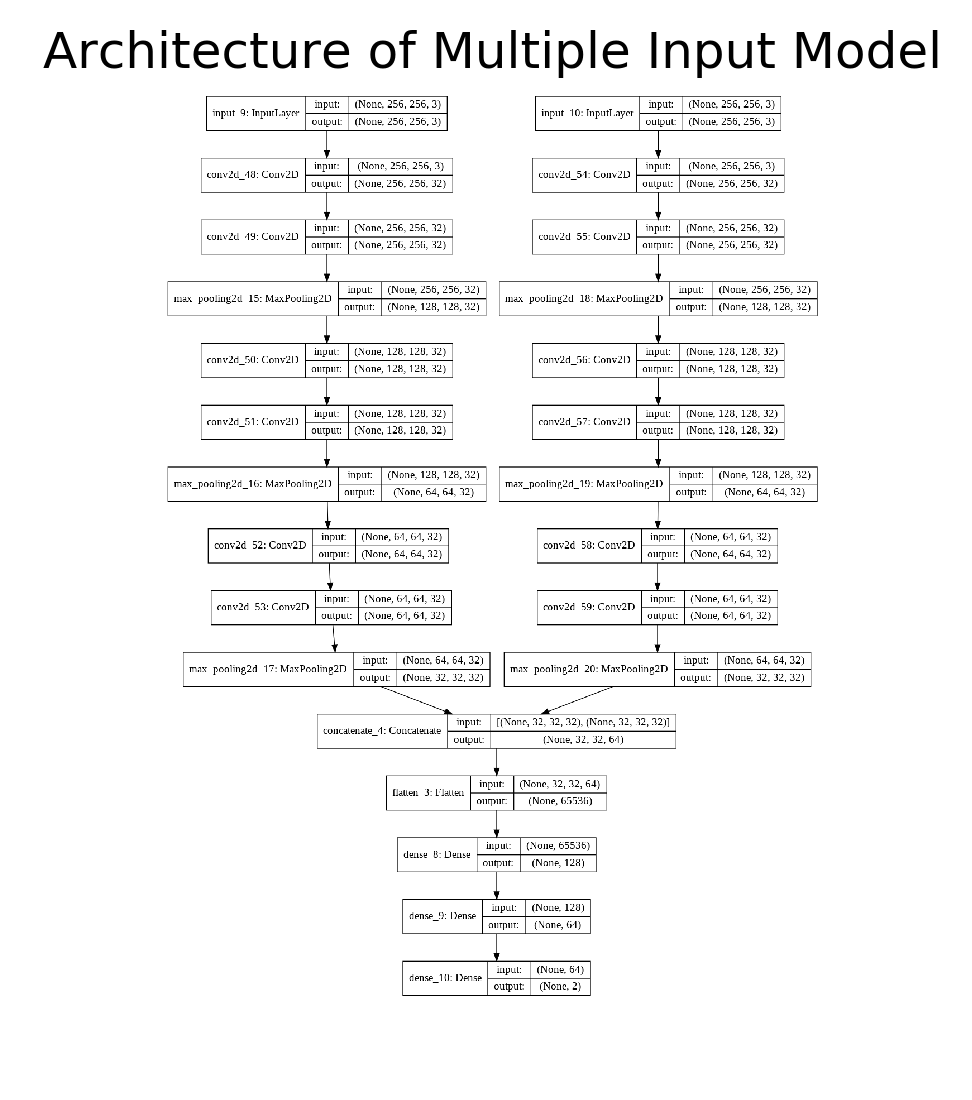

In [0]:
image_path = 'model.png'
keras.utils.plot_model(model_mult_3, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=300)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.title('Architecture of Multiple Input Model')
plt.show()

In [0]:
history_mult_3 = model_mult_3.fit_generator(train_generator, validation_data=val_generator, epochs = 100, steps_per_epoch = int(df_down.shape[0]/32), validation_steps= int(df_val.shape[0]/32), shuffle = True)

Found 14688 images belonging to 2 classes.
Found 14688 images belonging to 2 classes.
Epoch 1/100
458/459 [============================>.] - ETA: 0s - loss: 0.4136 - acc: 0.8096Found 16239 images belonging to 2 classes.
Found 16239 images belonging to 2 classes.
459/459 [==============================] - 457s 997ms/step - loss: 0.4135 - acc: 0.8097 - val_loss: 0.2524 - val_acc: 0.9122
Epoch 2/100
459/459 [==============================] - 456s 993ms/step - loss: 0.3041 - acc: 0.8702 - val_loss: 0.2747 - val_acc: 0.9137
Epoch 3/100
459/459 [==============================] - 453s 987ms/step - loss: 0.2538 - acc: 0.8945 - val_loss: 0.2435 - val_acc: 0.9116
Epoch 4/100
459/459 [==============================] - 456s 994ms/step - loss: 0.1855 - acc: 0.9274 - val_loss: 0.3341 - val_acc: 0.9005
Epoch 5/100
459/459 [==============================] - 459s 999ms/step - loss: 0.1414 - acc: 0.9476 - val_loss: 0.5790 - val_acc: 0.7991
Epoch 6/100
459/459 [==============================] - 458s 999m